### Precision - Recall and F1-score

Precision - Recall is a useful measure of success of prediction when the classes are very imbalanced. In information retrieval, precision is a measure of result relevancy, while recall is a measure of how many truly relevant results are returned.

The precision-recall curve shows the trade-off between precision and recall for different threshold. A high area under the curve represents both high recall and high precision, where high precision relates to a low false positive rate, and high recall relates to a low false negative rate. High scores for both show that the classifier is returning accurate results (high precision), as well as returning a majority of all positive results (high recall).

A system with high recall but low precision returns many results, but most of its predicted labels are incorrect when compared to the training labels. A system with high precision but low recall is just the opposite, returning very few results, but most of its predicted labels are correct when compared to the training labels. An ideal system with high precision and high recall will return many results, with all results labeled correctly.

Precision $P$ is defined as the number of true positives $T_{p}$ over the number of true positives plus the number of false positives $F_{p}$.

$P = \frac{T_{p}}{T_{p} + F_{p}}$

Recall $R$ is defined as the number of true positives $T_{p}$ over the number of true positives plus the number of false negatives $F_{n}$.

$R = \frac{T_{p}}{T_{p} + F_{n}}$

These quantities are also related to the $F1-score$, which is defined as the harmonic mean of precision and recall.

$F1 = 2 \frac{P \times N}{P + R}$

The $F1-score$ is primarily used to compare the performance of two classifiers. Suppose that classifier A has a higher recall, and classifier B has higher precision. In this case, the F1-scores for both the classifiers can be used to determine which one produces better results.

### Plot Precision - Recall for binary classification

In [1]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

X, y = load_iris(return_X_y=True)

# Add noisy features
random_state = np.random.RandomState(0)
n_samples, n_features = X.shape
X = np.concatenate([X, random_state.randn(n_samples, 200 * n_features)], axis=1)

# Limit to the two first classes, and split into training and test
X_train, X_test, y_train, y_test = train_test_split(
    X[y < 2], y[y < 2], test_size=0.5, random_state=random_state
)

In [2]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

classifier = make_pipeline(StandardScaler(), LinearSVC(random_state=random_state))
classifier.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearsvc',
                 LinearSVC(random_state=RandomState(MT19937) at 0x7FC02D447740))])

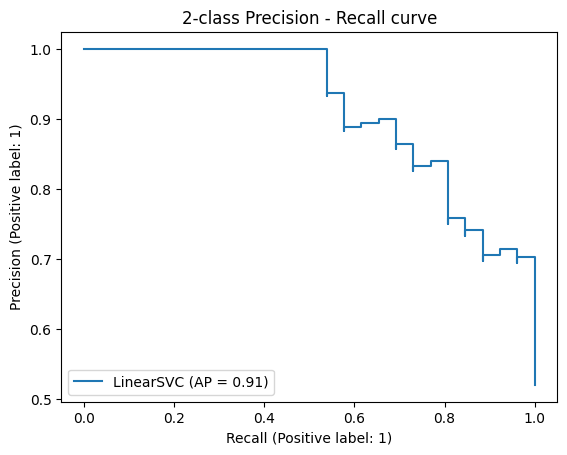

In [3]:
from sklearn.metrics import PrecisionRecallDisplay

display = PrecisionRecallDisplay.from_estimator(
    classifier, X_test, y_test, name="LinearSVC"
)
_ = display.ax_.set_title("2-class Precision - Recall curve")